<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/AE1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# autoencoder using keras applied to mnist - dimensionality reduction
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets.mnist import load_data
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.losses import mse, binary_crossentropy

In [2]:
# load dataset
(xtrain, _), (xtest, _) = load_data()   # dataset is already divided into training and testing sets
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape(len(xtrain), np.prod(xtrain.shape[1:]))
xtest = xtest.reshape(len(xtest), np.prod(xtest.shape[1:]))

print(xtrain.shape)
print(xtest.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [3]:
# autoencoder
# call neural network API: sequential model is a linear stack of layers
model = Sequential()
model.add(Dense(units = 32, activation='linear', input_dim=784, name='encoder_layer'))   # encoder
model.add(Dense(units = 784, activation='linear', name='decoder_layer'))                 # decoder
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='AE_plot.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image 
Image('AE_plot.png')


history = model.fit(x = xtrain, y= xtrain, epochs=10, batch_size=32, shuffle=True,\
                    validation_data=(xtrain, xtrain), verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_layer (Dense)        (None, 32)                25120     
_________________________________________________________________
decoder_layer (Dense)        (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0229 - accuracy: 0.0111 - val_loss: 0.0176 - val_accuracy: 0.0111
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - accuracy: 0.0117 - val_loss: 0.0175 - val_accuracy: 0.0112
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - accuracy: 0.0111 - val_loss: 0.0176 - val_accuracy: 0.0115
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175

313/313 [==============================] - 0s 943us/step


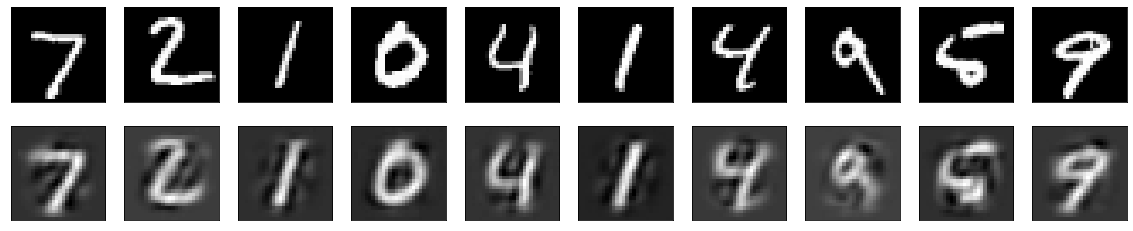

In [4]:
predicted_imgs = model.predict(xtest, verbose=1)

# encode and decode some digits
#encoded_imgs = encoder.predict(xtest)
#decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<Figure size 432x288 with 0 Axes>

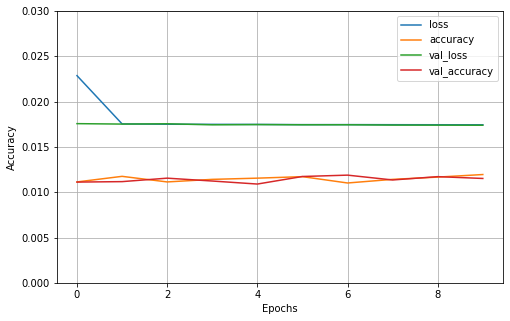

In [5]:
import pandas as pd

plt.figure()
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.03)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# New Section